In [3]:
#1
!pip install tensorflow==2.0
!conda install tensorflow=2.0
import tensorflow as tf




ERROR: Could not find a version that satisfies the requirement tensorflow==2.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.0


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... 


In [4]:
#2
import tensorflow as tf

# Define a simple function to perform addition
def add_numbers(a, b):
    return tf.add(a, b)

# Test the function
x = tf.constant(5)
y = tf.constant(3)

result = add_numbers(x, y)

# Print the result
print(f"The result of adding {x.numpy()} and {y.numpy()} is: {result.numpy()}")


The result of adding 5 and 3 is: 8


In [5]:
#3
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: Flatten the images and normalize
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Create a simple neural network with one hidden layer
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Hidden layer with 128 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse because labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make a prediction
predictions = model.predict(x_test)
print(f"Prediction for first test image: {np.argmax(predictions[0])}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8761 - loss: 0.4397
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9637 - loss: 0.1241
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9750 - loss: 0.0820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9812 - loss: 0.0590
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9864 - loss: 0.0444
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.0829
Test accuracy: 0.9751
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction for first test image: 7


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8796 - loss: 0.4210 - val_accuracy: 0.9562 - val_loss: 0.1437
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9640 - loss: 0.1215 - val_accuracy: 0.9697 - val_loss: 0.0994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9762 - loss: 0.0782 - val_accuracy: 0.9706 - val_loss: 0.0920
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9771 - val_loss: 0.0741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9739 - val_loss: 0.0849


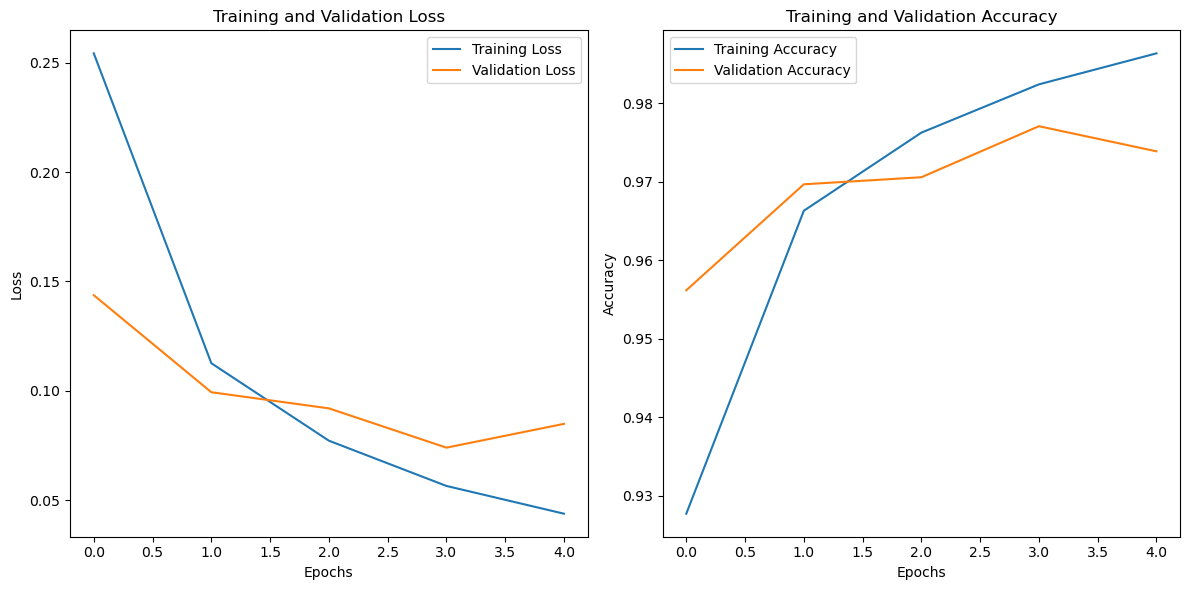

In [6]:
#4
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: Flatten the images and normalize
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Create a simple neural network with one hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and save the history object
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Visualize the training progress (loss and accuracy)
# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [8]:
#5
!pip install torch torchvision torchaudio
import torch

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check if PyTorch is using a GPU
if torch.cuda.is_available():
    print(f"CUDA is available. PyTorch will use the GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch will use the CPU.")


   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.0 MB ? eta -:--:--
   - -------------------------------------- 5.8/203.0 MB 25.1 MB/s eta 0:00:08
   -- ------------------------------------- 12.6/203.0 MB 29.2 MB/s eta 0:00:07
   --- ------------------------------------ 20.2/203.0 MB 31.9 MB/s eta 0:00:06
   ----- ---------------------------------- 27.3/203.0 MB 32.6 MB/s eta 0:00:06
   ------ --------------------------------- 30.7/203.0 MB 29.5 MB/s eta 0:00:06
   ------ --------------------------------- 35.4/203.0 MB 28.1 MB/s eta 0:00:06
   -------- ------------------------------- 42.7/203.0 MB 28.9 MB/s eta 0:00:06
   --------- ------------------------------ 49.8/203.0 MB 29.6 MB/s eta 0:00:06
   ---------- ----------------------------- 52.7/203.0 MB 30.0 MB/s eta 0:00:06
   ----------- ---------------------------- 59.5/203.0 MB 28.3 MB/s eta 0:00:06
   ------------- -------------------------- 66.6/203.0 MB 2

In [9]:
#6
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 pixels) to hidden layer (128 neurons)
        self.fc2 = nn.Linear(128, 10)       # Hidden layer (128 neurons) to output layer (10 classes)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the image (28x28) to a 1D vector
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # Output layer
        return x
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data (mean, std)
])

# Download and load the training and test datasets
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader for batching the data
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
# Create the neural network model
model = SimpleNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
# Train the model
num_epochs = 5  # Number of training epochs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")
# Evaluate the model on the test dataset
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to calculate gradients during testing
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test dataset: {accuracy:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:06<00:00, 1.63MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 75.8kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 899kB/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1/5, Loss: 0.37432605560336796
Epoch 2/5, Loss: 0.18792379973952705
Epoch 3/5, Loss: 0.1349040477224854
Epoch 4/5, Loss: 0.10879612230121899
Epoch 5/5, Loss: 0.09279521105727598
Accuracy on the test dataset: 96.61%


In [10]:
#7.
import torch
import torch.nn as nn

# Define the loss function (Cross-Entropy Loss for classification)
loss_fn = nn.CrossEntropyLoss()

# Example usage:
# Suppose we have the model's output (logits) and the target labels
output = torch.randn(64, 10)  # 64 samples, 10 classes (e.g., for MNIST)
target = torch.randint(0, 10, (64,))  # Random target labels (64 samples)

# Calculate the loss
loss = loss_fn(output, target)
print(f"Loss: {loss.item()}")


Loss: 2.703587770462036


In [11]:
#8.
import torch.optim as optim
import torch.nn as nn

# Example: A simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 pixels) to hidden layer (128 neurons)
        self.fc2 = nn.Linear(128, 10)       # Hidden layer (128 neurons) to output layer (10 classes)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the image (28x28) to a 1D vector
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # Output layer
        return x

# Create an instance of the model
model = SimpleNN()

# Define the optimizer (Adam in this case)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Example usage:
# Suppose we have a batch of data
input_data = torch.randn(64, 28 * 28)  # 64 samples, each 28x28 flattened
target_labels = torch.randint(0, 10, (64,))  # Random target labels (64 samples)

# Zero the gradients before the backward pass
optimizer.zero_grad()

# Forward pass
output = model(input_data)

# Calculate the loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, target_labels)

# Backward pass to compute gradients
loss.backward()

# Update the model's weights
optimizer.step()

print(f"Loss: {loss.item()}")


Loss: 2.294731378555298


In [13]:
#9.
import torch
import torch.nn as nn

class CustomMAELoss(nn.Module):
    def __init__(self, weight_factor=1.0):
        super(CustomMAELoss, self).__init__()
        self.weight_factor = weight_factor  # Factor to modify the loss

    def forward(self, output, target):
        # Calculate the Mean Absolute Error
        mae = torch.abs(output - target).mean()
        
        # Add a custom weighting based on the absolute value of the output
        weight = torch.abs(output).mean() * self.weight_factor
        loss = mae + weight  # Final custom loss: MAE + weight term
        
        return loss
